In [1]:
import torch
import torchzero as tz
from visualbench import FunctionDescent, test_functions

torch.manual_seed(0)
tz.m.HeavyBall

torchzero.modules.momentum.momentum.HeavyBall

# Momentum
### Heavy-ball momentum
Momentum can be used to accelerate gradient descent and possibly other algorithms. The idea is to add "intertia" to gradient descent by using the Polyak's momentum formula[1]:
$$
x_{t+1} = x_t - \eta \nabla f(x_t) + \beta (x_t - x_{t-1})
$$
Here $\eta$ is the step size and $\beta$ is the momentum hyperparameter, often set to 0.9 or 0.95.

The formula can be also rewritten in the following way:
$$
v \rightarrow  \beta v + \nabla f(x) \\\\

x \rightarrow x - \eta v
$$
Here $v$ is the velocity which is used to update the parameters.

Let's run it on rosenbrock's function
$$
f(x,y) = (1 - x)^2 + 100 * (y - x^2)^2
$$

Standard gradient descent requires about 10,000 steps to reach the value of 1e-4, whereas HeavyBall method requires only 2,000 steps.

finished in 2.0s., reached loss = 0.000154                                      


<Axes: >

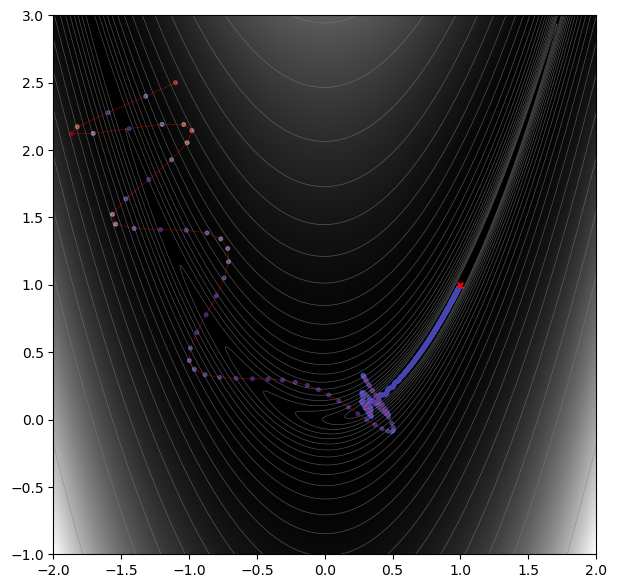

In [21]:
func = FunctionDescent('rosen')
optimizer = tz.Modular(func.parameters(), tz.m.HeavyBall(0.95), tz.m.LR(2e-4))
func.run(optimizer, max_steps=2000)
func.plot(log_contour=True)

### Nesterov's momentum

Heavy ball momentum can have a lot of oscillation as seen on rosenbrock function, and Nesterov's momentum formula[2] tends to reduce those osciallations, often leading to faster convergence.

$$
v \rightarrow \beta (v + \nabla f(x)) \\\\

x \rightarrow x - \eta (\nabla f(x) + v)
$$

finished in 0.9s., reached loss = 6.89e-09                                      


<Axes: >

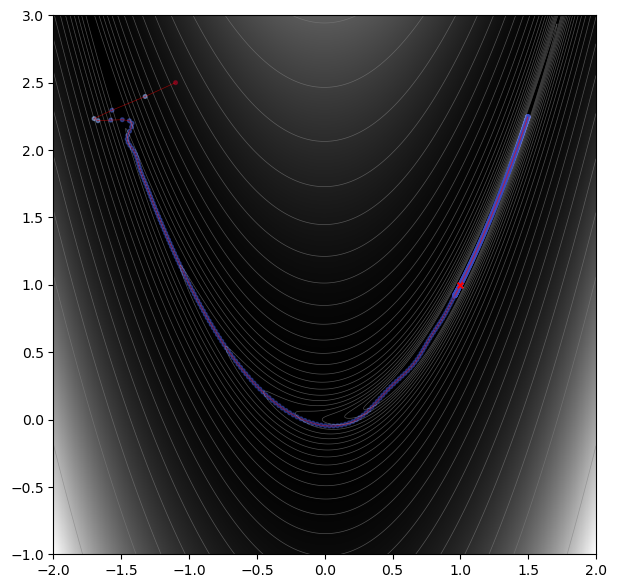

In [24]:
func = FunctionDescent('rosen')
optimizer = tz.Modular(func.parameters(), tz.m.NAG(0.99), tz.m.LR(2e-4))
func.run(optimizer, max_steps=1000)
func.plot(log_contour=True)

### Exponential moving average
Many optimizers, for example Adam, use the exponential moving average of gradients in place of momentum. The formula is similar to heavy ball formula, but with an extra $(1 - \beta)$ term:
$$
v \rightarrow \beta v + (1 - \beta) \nabla f(x) \\\\

x \rightarrow x - \eta v
$$

finished in 1.9s., reached loss = 0.000117                                      


<Axes: >

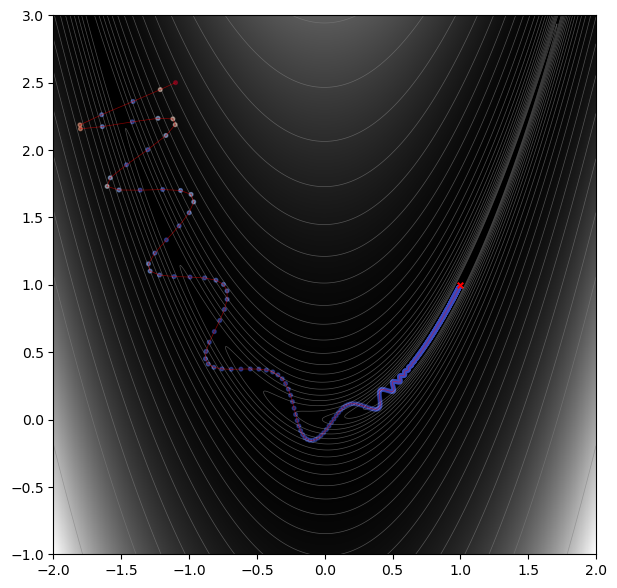

In [28]:
func = FunctionDescent('rosen')
optimizer = tz.Modular(func.parameters(), tz.m.EMA(0.95), tz.m.LR(4e-3))
func.run(optimizer, max_steps=2000)
func.plot(log_contour=True)

### Cautious momentum
The idea of cautious updates was introduced in [3]. The idea is that when signs of gradient and momentum for a weight differ, update for that weight is zeroed. Cautioning can be applied to any momentum-based optimizer.

finished in 3.1s., reached loss = 1e-05                                      


<Axes: >

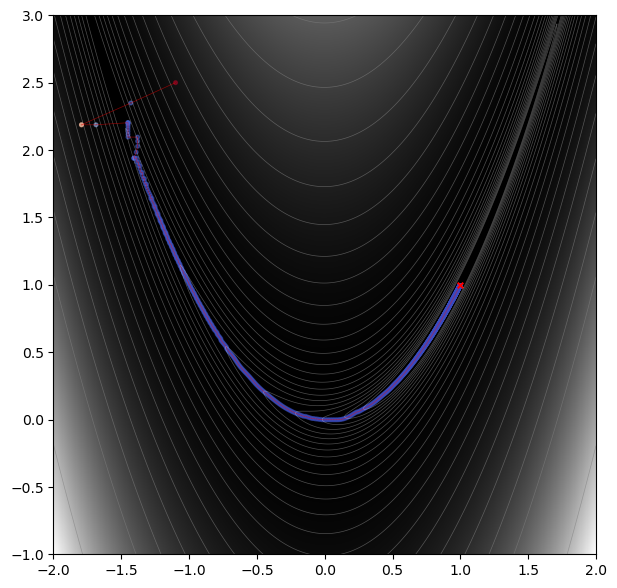

In [52]:
func = FunctionDescent('rosen')
optimizer = tz.Modular(func.parameters(), tz.m.HeavyBall(0.95), tz.m.Cautious(), tz.m.LR(3e-4))
func.run(optimizer, max_steps=2000)
func.plot(log_contour=True)

### Nested momentum

As an experiment it is possible to take the output of a momentum module and pass it to another momentum module:

finished in 2.9s., reached loss = 0.000279                                      


<Axes: >

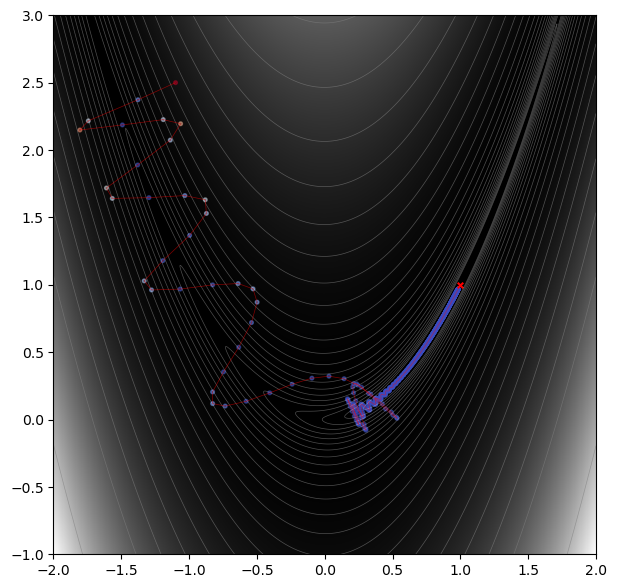

In [45]:
func = FunctionDescent('rosen')
optimizer = tz.Modular(
    func.parameters(), 
    tz.m.NAG(0.7),
    tz.m.NAG(0.7),
    tz.m.NAG(0.7),
    tz.m.LR(1e-4),
)
func.run(optimizer, max_steps=2000)
func.plot(log_contour=True)

# References
[1] Polyak, Boris T. "Some methods of speeding up the convergence of iteration methods." Ussr computational mathematics and mathematical physics 4.5 (1964): 1-17.

[2] Nesterov, Yurii. "A method for solving the convex programming problem with convergence rate O (1/k2)." Dokl akad nauk Sssr. Vol. 269. 1983.

[3] Cautious Optimizers: Improving Training with One Line of Code. Kaizhao Liang, Lizhang Chen, Bo Liu, Qiang Liu